<h1>Churn Prediction</h1>

In [73]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [74]:
#Setting work directory
import os
os.chdir('C:\\Users\\pak16\\Desktop')

In [75]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')

<h2>Basic Stats and EDA</h2>

In [76]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


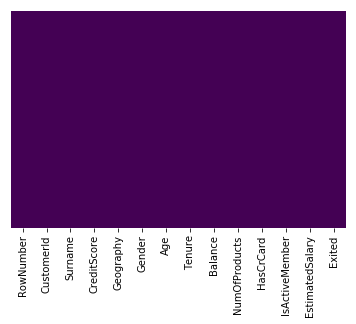

In [79]:
#checking for missing values
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [108]:
#no missing values 

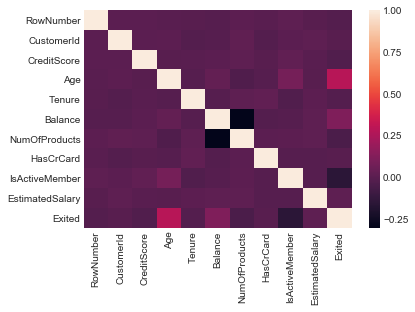

In [109]:
#checking for correlation
sns.heatmap(dataset.corr())

In [110]:
#Looks like age and exicted have correlation of 0.4 -accepted
#Exicted and ActiveMember is negitively correlated
#also no of products and balance is negitively correlated

C:\Users\pak16\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


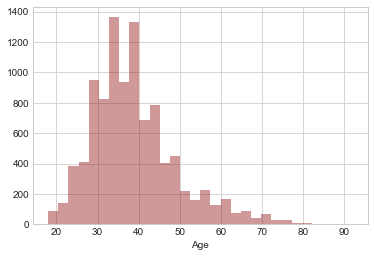

In [111]:
sns.distplot(dataset['Age'].dropna(),kde=False,color='darkred',bins=30)

In [112]:
#The age is Right skewed
#maximum people are in 30-40 Age Range

C:\Users\pak16\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


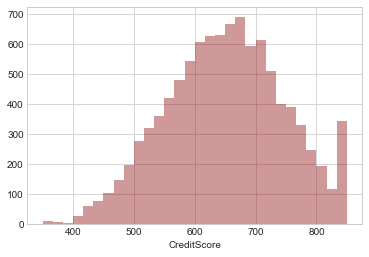

In [113]:
sns.distplot(dataset['CreditScore'].dropna(),kde=False,color='darkred',bins=30)


In [114]:
###Credit Score is Left Skewed---which generally happens to be the case

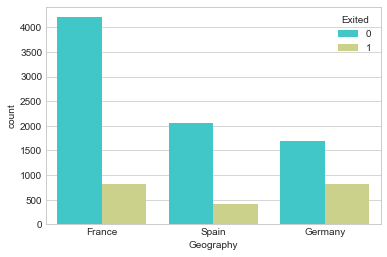

In [115]:
sns.set_style('whitegrid')
sns.countplot(x='Geography',hue='Exited',data=dataset,palette='rainbow')

In [116]:
#People from Germany have more tendency to leave
#Not consideing total no. of people in each country's bank

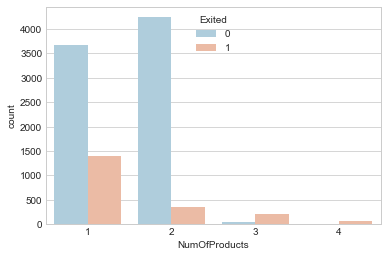

In [117]:
sns.set_style('whitegrid')
sns.countplot(x='NumOfProducts',hue='Exited',data=dataset,palette='RdBu_r')

In [ ]:
#####People with 1 product are more likely to leave

<h2>Data Cleaning</h2>

In [68]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [69]:
####Estimated Salary has low values 
####Let's check estmated salary with high balance
####basic assumption EstimatedSalary * Age(experience) <= Balance 

In [93]:
dataset[(dataset['EstimatedSalary']* (dataset['Age'])<=dataset['Balance']) & (dataset['Balance']>50000)].head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
195,196,15594815,Aleshire,807,France,Male,35,3,174790.15,1,1,1,600.36,0
361,362,15696674,Robinson,643,Germany,Female,45,2,150842.93,1,0,1,2319.96,1
396,397,15584766,Knight,557,France,Male,33,3,54503.55,1,1,1,371.05,0
551,552,15657284,Day,674,Germany,Male,47,6,106901.94,1,1,1,2079.20,1
591,592,15604044,Mitchell,700,France,Male,38,8,134811.30,1,1,0,1299.75,0


In [45]:
###Assumption is true person with $600 Estimated Salary and age 35 has $175000 as bank balance, which doesnt make any sense

In [94]:
#replace those salaries by balance/age
#only imputing small estimates with normal values
dataset['EstimatedSalary']= np.where((dataset['EstimatedSalary']* (dataset['Age'])<dataset['Balance']) & (dataset['Balance']>50000),dataset['Balance']/dataset['Age'] , dataset['EstimatedSalary'])

<h2>Feature Engineering</h2>

In [119]:
#Dividing Dataset in to independent matrix and dependent vector
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [120]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

In [121]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [122]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [123]:
#creating function for applying k-Fold Cross Validation

def kfold(model,X,y):
    from sklearn.model_selection import cross_validate
    from sklearn.metrics import recall_score

    scoring = ['accuracy','roc_auc', 'recall']


    scores = cross_validate(model, X, y, scoring=scoring,
                              cv=5, return_train_score=False)
    return scores

In [142]:
#defining function for ROC Curve
def roc(y_test,y_pred,Model):   
    from sklearn import metrics
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for Churn classifier: {}'.format(Model))
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)

In [143]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier_logistic = LogisticRegression()
classifier_logistic.fit(X_train, y_train)

# Predicting the Test set results
y_pred_logistic = classifier_logistic.predict(X_test)

#K fold Cross Validation
scores_1=kfold(classifier_logistic,X,y)
Model_1='Logistic Regression'

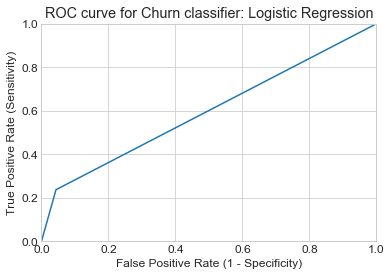

In [144]:
roc(y_test, y_pred_logistic,Model_1)

In [146]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)#for Euclidean distance
classifier_knn.fit(X_train, y_train)

# Predicting the Test set results
y_pred_knn = classifier_knn.predict(X_test)

#K fold Cross Validation
scores_2=kfold(classifier_knn,X,y)
Model_2='K-Nearest Neighbours'

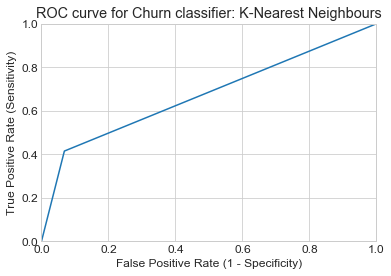

In [148]:
roc(y_test, y_pred_knn,Model_2)
#better predictions than Linear Regression

In [131]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

# Predicting the Test set results
y_pred_nb = classifier_nb.predict(X_test)

#K fold Cross Validation
scores_3=kfold(classifier_nb,X,y)
Model_3='Naive Bayes'

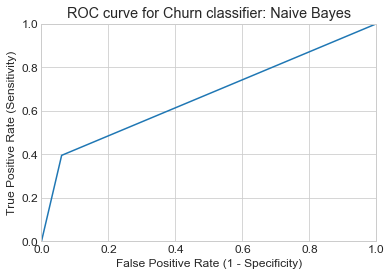

In [149]:
roc(y_test, y_pred_nb,Model_3)
#similiar curve to k-nn
#no improvement

In [133]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 500)
classifier_rf.fit(X_train, y_train)

# Predicting the Test set results
y_pred_rf = classifier_rf.predict(X_test)
#K fold Cross Validation
scores_4=kfold(classifier_rf,X,y)
Model_4='Random Forest'

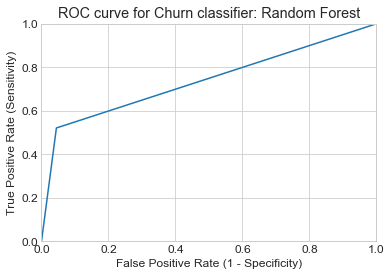

In [151]:
roc(y_test, y_pred_rf,Model_4)
#better predictions than knn and naive bayes algorithms

In [137]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(n_estimators=500)
classifier_xgb.fit(X_train, y_train)

# Predicting the Test set results
y_pred_xgb = classifier_xgb.predict(X_test)

#K fold Cross Validation
scores_5=kfold(classifier_xgb,X,y)
Model_5='XGBoost'

C:\Users\pak16\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pak16\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pak16\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\pak16\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

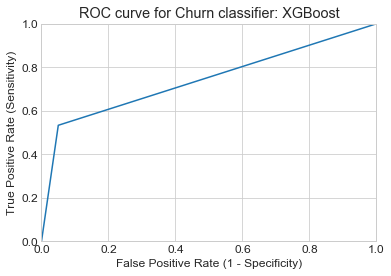

In [152]:
roc(y_test, y_pred_xgb,Model_5)
#Similar to Random Forest

In [154]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

C:\Users\pak16\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [177]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)


C:\Users\pak16\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform")`
  """
C:\Users\pak16\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  
C:\Users\pak16\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\pak16\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/100
8000/8000 [==============================] - 1s 133us/step - loss: 0.6136 - acc: 0.7957
Epoch 2/100
8000/8000 [==============================] - 1s 85us/step - loss: 0.5189 - acc: 0.8107
Epoch 3/100
8000/8000 [==============================] - 1s 84us/step - loss: 0.4786 - acc: 0.8201
Epoch 4/100
8000/8000 [==============================] - 1s 86us/step - loss: 0.4673 - acc: 0.8216
Epoch 5/100
8000/8000 [==============================] - 1s 99us/step - loss: 0.4637 - acc: 0.8226
Epoch 6/100
8000/8000 [==============================] - 1s 86us/step - loss: 0.4621 - acc: 0.8231
Epoch 7/100
8000/8000 [==============================] - 1s 84us/step - loss: 0.4616 - acc: 0.8239
Epoch 8/100
8000/8000 [==============================] - 1s 88us/step - loss: 0.4610 - acc: 0.8241
Epoch 9/100
8000/8000 [==============================] - 1s 91us/step - loss: 0.4606 - acc: 0.8237
Epoch 10/100
8000/8000 [==============================] - 1s 86us/step - loss: 0.4605 - acc: 0.8231
Epoch 11

8000/8000 [==============================] - 1s 100us/step - loss: 0.3335 - acc: 0.8630
Epoch 83/100
8000/8000 [==============================] - 1s 96us/step - loss: 0.3336 - acc: 0.8636
Epoch 84/100
8000/8000 [==============================] - 1s 96us/step - loss: 0.3337 - acc: 0.8627
Epoch 85/100
8000/8000 [==============================] - 1s 100us/step - loss: 0.3331 - acc: 0.8640
Epoch 86/100
8000/8000 [==============================] - 1s 102us/step - loss: 0.3340 - acc: 0.8616
Epoch 87/100
8000/8000 [==============================] - 1s 98us/step - loss: 0.3336 - acc: 0.8630
Epoch 88/100
8000/8000 [==============================] - 1s 99us/step - loss: 0.3331 - acc: 0.8625
Epoch 89/100
8000/8000 [==============================] - 1s 101us/step - loss: 0.3330 - acc: 0.8646
Epoch 90/100
8000/8000 [==============================] - 1s 103us/step - loss: 0.3329 - acc: 0.8622
Epoch 91/100
8000/8000 [==============================] - 1s 97us/step - loss: 0.3328 - acc: 0.8646
Epoch 92

In [178]:
# Predicting the Test set results
y_pred_ann = classifier.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5)
Model_6='Neural Networks'

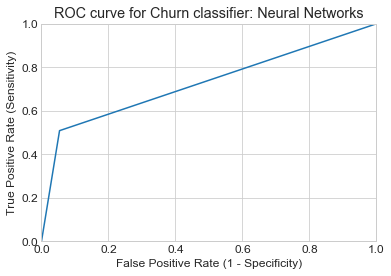

In [179]:
roc(y_test, y_pred_ann,Model_6)

In [180]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,roc_auc_score
roc_auc=roc_auc_score(y_test, y_pred_ann)
cm = confusion_matrix(y_test, y_pred_ann)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]      
accuracy=(TN+TP)/float(FP+FN+TP+TN)
sensitivity = TP / float(FN + TP)  

In [182]:
print("Model Name            Accuracy           Sensitivity")
print(Model_1," ",scores_1['test_accuracy'].mean(),"",scores_1['test_recall'].mean(),scores_1['test_roc_auc'].mean())
print(Model_2,"",scores_2['test_accuracy'].mean(),scores_2['test_recall'].mean(),"",scores_2['test_roc_auc'].mean())
print(Model_3,"         ",scores_3['test_accuracy'].mean(),scores_3['test_recall'].mean(),scores_3['test_roc_auc'].mean())
print(Model_4,"       ",scores_4['test_accuracy'].mean(),scores_4['test_recall'].mean(),"",scores_4['test_roc_auc'].mean())
print(Model_5,"             ",scores_5['test_accuracy'].mean(),scores_5['test_recall'].mean(),"",scores_5['test_roc_auc'].mean())
print(Model_6,"     ",accuracy,"           ",sensitivity," ",roc_auc)

Model Name            Accuracy           Sensitivity
Logistic Regression   0.789899807874952  0.06430119959531723 0.6744653571670427
K-Nearest Neighbours  0.7668999032749758 0.0908127378715614  0.5341704288760105
Naive Bayes           0.7847001067250268 0.07511321481909718 0.7445942965564586
Random Forest         0.8645990729997683 0.4727561786385316  0.855223265457596
XGBoost               0.8640994229748558 0.4904321433733198  0.861554336170354
Neural Networks       0.8575             0.508641975308642   0.7273617400054181


Random Forest Model has the highest accuracy of 86.46% followed by XGBoost with an accuracy of 86.41%
But Since we are considering Churn predictions Sensitivity should be used as evaluation matrix because
if we say a customer will not leave but he leaves, then it is big problem.
In simple words, false positives (customers that are predicted to leave but don't leave) are more acceptable than false negatives (customers that are predicted not to leave but leave).

Therefore, Neural Networks is the winner model with 50.86% sensitivity followed by  XGBoost(49.04%)